<a href="https://colab.research.google.com/github/JishnuMoorthy/Business_Analytics_Projects/blob/main/(780)%20Investigating%20Car%20Crashes%20in%20Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Improving Safety: Chicago Accident Data Analysis**


---

##**Problem Definition:**
This analysis aims to study the problem of car accidents in Chicago by examining influential factors, with a focus on safety concerns. It seeks to reveal patterns and significant causes through accident data analysis, offering insights for residents and authorities to mitigate risks and enhance overall safety.

##**Data Source:**

The dataset was obtained from Data.gov. It contains all the car crashes reported and recorded in the city of Chicago since 2015.

Link to the publisher can be found [here](https://catalog.data.gov/dataset?publisher=data.cityofchicago.org)



The link to the dataset is [here](https://catalog.data.gov/dataset/traffic-crashes-crashes)




##**Motivation:**

Our motivation is to enhance road safety by identifying accident patterns and causes. This informs the development of safety measures and efficient resource allocation for interventions, such as prioritizing road maintenance in high-accident areas, ultimately reducing the risk of future accidents.







##**Dataset:**
Importing the data set and necessary Python packages.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from IPython.display import display


df = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD')

df.head()


CRASH_RECORD_ID     RD_NO  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...  JG387648   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...  JG361138   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...  JG388133   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...  JC524901   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...  JG387475   

  CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0              NaN  08/18/2023 12:50:00 PM                  15   
1              NaN  07/29/2023 02:45:00 PM                  30   
2              NaN  08/18/2023 05:58:00 PM                  30   
3              NaN  11/26/2019 08:38:00 AM                  25   
4              NaN  08/18/2023 10:45:00 AM                  20   

  TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION WEATHER_CONDITION  \
0                  OTHER  FUNCTIONING PROPERLY             CLEAR   
1         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   
2            NO CONTROLS           NO CONTROLS             CLEAR   
3            NO CONTROLS           NO CONTROLS             CLEAR   
4            NO CONTROLS           NO CONTROLS             CLEAR   

  LIGHTING_CONDITION      FIRST_CRASH_TYPE  ... INJURIES_NON_INCAPACITATING  \
0           DAYLIGHT              REAR END  ...                         1.0   
1           DAYLIGHT  PARKED MOTOR VEHICLE  ...                         0.0   
2           DAYLIGHT          PEDALCYCLIST  ...                         1.0   
3           DAYLIGHT            PEDESTRIAN  ...                         0.0   
4           DAYLIGHT          FIXED OBJECT  ...                         0.0   

   INJURIES_REPORTED_NOT_EVIDENT INJURIES_NO_INDICATION INJURIES_UNKNOWN  \
0                            0.0                    1.0              0.0   
1                            0.0                    1.0              0.0   
2                            0.0                    1.0              0.0   
3                            0.0                    1.0              0.0   
4                            0.0                    1.0              0.0   

  CRASH_HOUR CRASH_DAY_OF_WEEK CRASH_MONTH   LATITUDE  LONGITUDE  \
0         12                 6           8        NaN        NaN   
1         14                 7           7  41.854120 -87.665902   
2         17                 6           8  41.942976 -87.761883   
3          8                 3          11        NaN        NaN   
4         10                 6           8        NaN        NaN   

                                   LOCATION  
0                                       NaN  
1  POINT (-87.665902342962 41.854120262952)  
2  POINT (-87.761883496974 41.942975745006)  
3                                       NaN  
4                                       NaN  

[5 rows x 49 columns]

In [ ]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

#**Data Cleaning:**
We considered which columns should we retain to address our problem definition, and which ones can we omit to create a more streamlined and compact dataset.
After dropping the omitted columns, we have a dataset with the important columns that would lead us to creating meaningful insights.


In [ ]:
df.drop(['RD_NO', 'CRASH_DATE_EST_I','LANE_CNT','ALIGNMENT','REPORT_TYPE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','SEC_CONTRIBUTORY_CAUSE','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','NUM_UNITS','INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','STREET_DIRECTION'], axis=1)


CRASH_RECORD_ID  \
0       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
1       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
2       61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...   
3       004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...   
4       a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...   
...                                                   ...   
777689  cb0ca76762ca65feacb1f6513312f96f2a05629bd8a866...   
777690  f2c0204e5392ff379e5804ad25fad66304949d517327c6...   
777691  e88a7d78baea3f2de14f0042ce24937d03ca58553c7102...   
777692  5c36f4e91b3deefd051dee799c3957b198389d8fe01247...   
777693  f829a8bd9a1afc120ed6720cdb20a22b1a90b81278002b...   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       08/18/2023 12:50:00 PM                  15                  OTHER   
1       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2       08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3       11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4       08/18/2023 10:45:00 AM                  20            NO CONTROLS   
...                        ...                 ...                    ...   
777689  06/01/2020 03:23:00 PM                  30            NO CONTROLS   
777690  10/18/2020 12:03:00 AM                  30            NO CONTROLS   
777691  10/23/2018 03:30:00 AM                  30       LANE USE MARKING   
777692  01/06/2020 01:03:00 PM                  30            NO CONTROLS   
777693  01/06/2020 08:30:00 AM                  15            NO CONTROLS   

            DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0       FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
1       FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
2                NO CONTROLS             CLEAR                DAYLIGHT   
3                NO CONTROLS             CLEAR                DAYLIGHT   
4                NO CONTROLS             CLEAR                DAYLIGHT   
...                      ...               ...                     ...   
777689           NO CONTROLS             CLEAR                DAYLIGHT   
777690           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
777691           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
777692           NO CONTROLS             CLEAR                DAYLIGHT   
777693           NO CONTROLS             CLEAR                DAYLIGHT   

                    FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  \
0                           REAR END                            OTHER   
1               PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)   
2                       PEDALCYCLIST                      NOT DIVIDED   
3                         PEDESTRIAN                          ONE-WAY   
4                       FIXED OBJECT                            OTHER   
...                              ...                              ...   
777689                    PEDESTRIAN                   T-INTERSECTION   
777690      SIDESWIPE SAME DIRECTION                      NOT DIVIDED   
777691  SIDESWIPE OPPOSITE DIRECTION                 CENTER TURN LANE   
777692                         ANGLE                      NOT DIVIDED   
777693                         ANGLE                            ALLEY   

       ROADWAY_SURFACE_COND  ...  \
0                       DRY  ...   
1                       DRY  ...   
2                       DRY  ...   
3                       DRY  ...   
4                       DRY  ...   
...                     ...  ...   
777689                  DRY  ...   
777690                  DRY  ...   
777691                  DRY  ...   
777692                  DRY  ...   
777693                  DRY  ...   

                                  PRIM_CONTRIBUTORY_CAUSE STREET_NO  \
0                                   FOLLOWING TOO CLOSELY       700   
1                  FAILING TO REDUCE SPEED 

**Data dictionary:**
Each row now in the dataset represents a traffic crash reported in Chicago. After data cleaning, we kept following columns:
* **CRASH_RECORD_ID** : A unique identifier for a crash record
* **CRASH_DATE** : The date and time that the crash occured
* **POSTED_SPEED_LIMIT** : The speed limit posted on the road where the crash occurred
* **TRAFFIC_CONTROL_DEVICE** :  The type of traffic control device present at the crash site
* **DEVICE_CONDITION** : The conditions of traffic control devices
* **WEATHER_CONDITION** : The weather at the time the crash occured
* **LIGHTING_CONDITION** : The lighting condition at the time the crash occured
* **FIRST_CRASH_TYPE** : The type of the crash
* **TRAFFICWAY_TYPE** : different types of intersections or road configurations where the accident occured
* **ROADWAY_SURFACE_COND** : The condition of the road surface at the crash site
* **ROAD_DEFECT** : Any defects or issues with the road at the crash site.
* **CRASH_TYPE** : If there is injury/towing involved at the scene
* **HIT_AND_RUN_I** : Indicates whether the crash involved a hit-and-run
* **DAMAGE** : The extent of financial loss caused in the crash
* **DATE_POLICE_NOTIFIED** : The date and time when the police were notified about the crash.
* **PRIM_CONTRIBUTORY_CAUSE** : The primary cause of the crash
* **STREET_NO** : The number of the street address where the crash occured
* **STREET_NAME** : The name of the street where the crash occured
* **MOST_SEVERE_INJURY** : The most severe injury sustained by any person involved in the crash.
* **CRASH_HOUR** : Which hour of a day did the crash occur
* **CRASH_DAY_OF_WEEK** : Which day of a week did the crash occur
* **CRASH_MONTH** : Which month did the crash occur
* **LATITUDE** : The latitude of the accident site
* **LONGITUDE** : The longtitude of the accident site
* **LOCATION** : The combination of latitude and longtitude


#**Data Exploration**:

Below are the questions, answers and code that we developed towards exploring our dataset. This provided insights on reasons for why, when and how these car crashes took palce within the city.

**Question 1:**


What were the road conditions, traffic control (such as signals or signs), light conditions, and weather at the time of the accident?


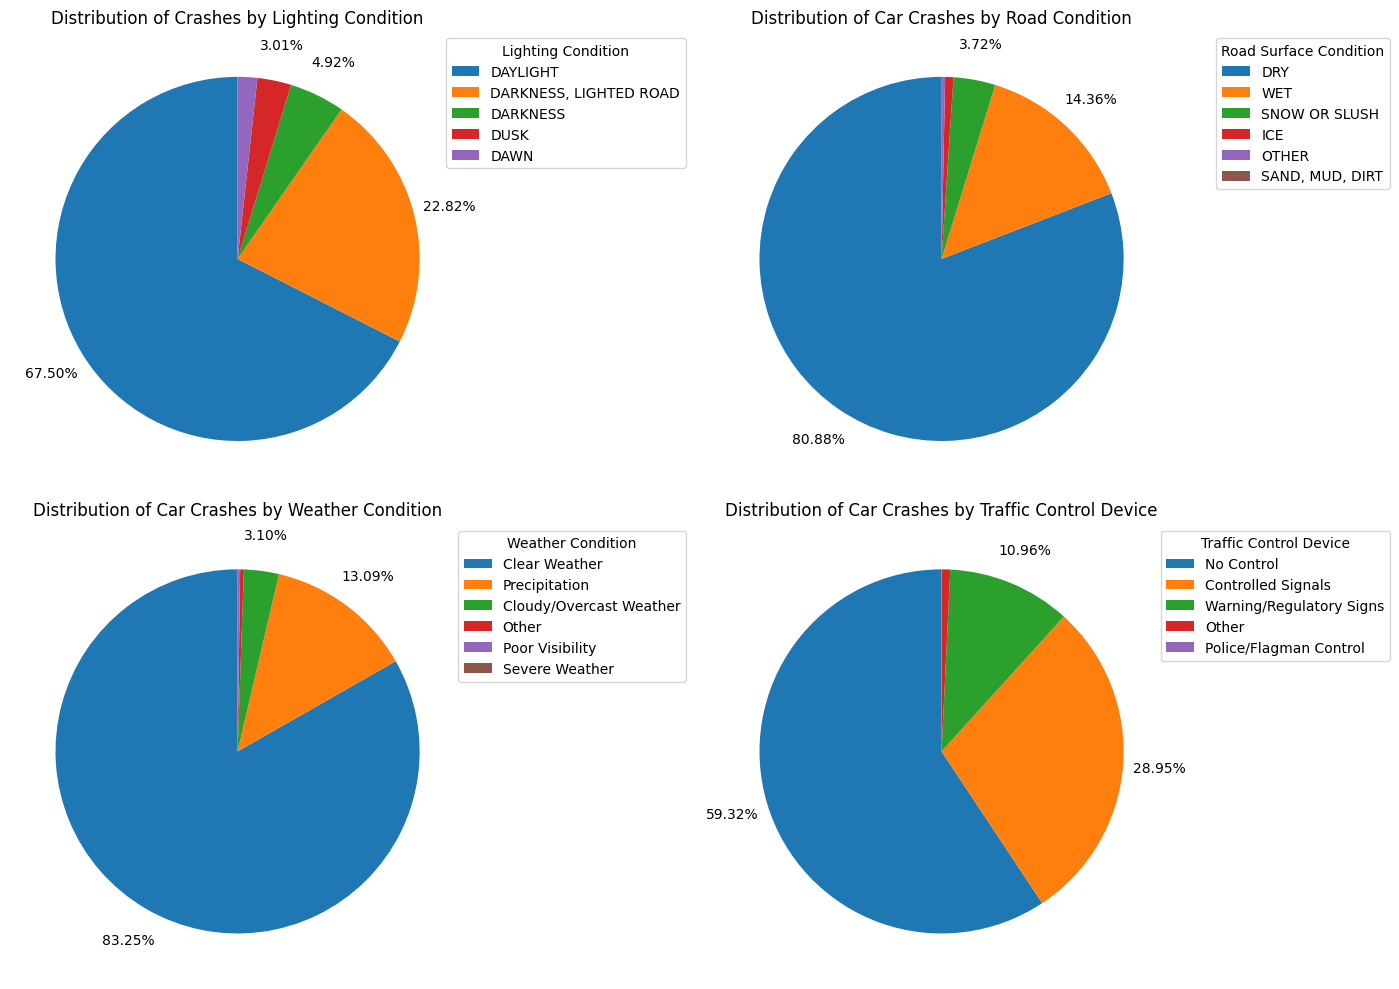

In [ ]:
# Create a mapping dictionary to categorize the traffic control devices
traffic_control_mapping = {
  'Controlled Signals': ['TRAFFIC SIGNAL', 'FLASHING CONTROL SIGNAL', 'RR CROSSING SIGN', 'RAILROAD CROSSING GATE'],
    'Warning/Regulatory Signs': ['STOP SIGN/FLASHER', 'NO PASSING', 'YIELD', 'SCHOOL ZONE', 'DELINEATORS', 'LANE USE MARKING',
                                 'BICYCLE CROSSING SIGN', 'PEDESTRIAN CROSSING SIGN', 'OTHER WARNING SIGN', 'OTHER REG. SIGN'],
    'Police/Flagman Control': ['POLICE/FLAGMAN'],
    'Other': ['UNKNOWN', 'OTHER', 'OTHER RAILROAD CROSSING'],'No Control':['NO CONTROLS']
}

# Map 'TRAFFIC_CONTROL_DEVICE' column to the new categories
df['TRAFFIC_CONTROL_DEVICE_CATEG'] = df['TRAFFIC_CONTROL_DEVICE'].map(
    {value: category for category, values in traffic_control_mapping.items() for value in values}
)

#create a mapping dictionary to categorize the weather condition
weather_condition_mapping={
    'Clear Weather':['CLEAR'],'Precipitation':['RAIN','SNOW','FREEZING RAIN/DRIZZLE','SLEET/HAIL'],
    'Cloudy/Overcast Weather':['CLOUDY/OVERCAST'],'Poor Visibility':['FOG/SMOKE/HAZE','BLOWING SNOW','BLOWING SAND, SOIL, DIRT'],
    'Severe Weather':['SEVERE CROSS WIND GATE'],'Other':['OTHER','UNKNOWN']
}
# Map 'WEATHER_CONDITION' column to the new categories
df['WEATHER_CONDITION_CATEG'] = df['WEATHER_CONDITION'].map(
    {value: category for category, values in weather_condition_mapping.items() for value in values}
)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Create a function to filter the percentage greater than 2% and show it on the plots
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct > 2:
        return "{:.2f}%".format(pct)
    else:
        return ""

# Lighting Condition
filter1 = df["LIGHTING_CONDITION"] != "UNKNOWN"
lighting_counts = df[filter1]['LIGHTING_CONDITION'].value_counts()
axs[0, 0].pie(lighting_counts, autopct=lambda pct: func(pct, lighting_counts), startangle=90, pctdistance=1.2)
axs[0, 0].set_title('Distribution of Crashes by Lighting Condition')
axs[0, 0].legend(lighting_counts.index, title="Lighting Condition", loc="upper right", bbox_to_anchor=(1.5, 1))

# Road Surface Condition
filter2 = df["ROADWAY_SURFACE_COND"] != "UNKNOWN"
road_surface_counts = df[filter2]['ROADWAY_SURFACE_COND'].value_counts()
axs[0, 1].pie(road_surface_counts, autopct=lambda pct: func(pct, road_surface_counts), startangle=90, pctdistance=1.2)
axs[0, 1].set_title('Distribution of Car Crashes by Road Condition')
axs[0, 1].legend(road_surface_counts.index, title="Road Surface Condition", loc="upper right", bbox_to_anchor=(1.5, 1))

# Weather Condition
filter3 = df["WEATHER_CONDITION"] != "UNKNOWN"
weather_counts = df[filter3]['WEATHER_CONDITION_CATEG'].value_counts()
axs[1, 0].pie(weather_counts, autopct=lambda pct: func(pct, weather_counts), startangle=90, pctdistance=1.2)
axs[1, 0].set_title('Distribution of Car Crashes by Weather Condition')
axs[1, 0].legend(weather_counts.index, title="Weather Condition", loc="upper right", bbox_to_anchor=(1.5, 1))

# Traffic Control Device
filter4 = df["TRAFFIC_CONTROL_DEVICE"] != "UNKNOWN"
traffic_control_counts = df[filter4]['TRAFFIC_CONTROL_DEVICE_CATEG'].value_counts()
axs[1, 1].pie(traffic_control_counts, autopct=lambda pct: func(pct, traffic_control_counts), startangle=90, pctdistance=1.2)
axs[1, 1].set_title('Distribution of Car Crashes by Traffic Control Device')
axs[1, 1].legend(traffic_control_counts.index, title="Traffic Control Device", loc="upper right", bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()

**Answer 1:**

Based on the provided data, we can draw the following conclusions:
1.   **Lighting Conditions：**
Most accidents occurred during daylight, with a significantly higher number of accidents compared to other lighting conditions like darkness, dusk, and dawn., indicating that accidents are more common during daytime when visibility is generally better. Darkness, Lighted Road comes second, suggesting that accidents still occur at night, but on roads with artificial lighting.
2.   **Roadway Surface Conditions：**Accidents predominantly occurred on dry roads, and this highlights that accidents are more prevalent on dry surfaces.Wet roads have a substantial number of accidents, indicating that rain or wet conditions still pose significant risks.
3.   **Weather Conditions:**Accidents are most common during clear weather, indicating that adverse weather conditions like rain, snow, or fog might not be significant contributing factors to accidents in this dataset.
Precipitation (rain, snow, etc.) is the second most common weather condition during accidents, indicating that wet conditions do contribute to a substantial number of accidents.
4.   **Traffic Control Devices:**Accidents are more frequent at locations with no control devices, indicating potential issues with traffic management and enforcement in these areas.Controlled signals come next, indicating that intersections with traffic lights still see a significant number of accidents.

**Question 2:**
When did the accidents happen? During which months do we observe the most crashes happen? And what time of the day did they occur in?
After initial observation of data, we realize that the data only included half of the year in 2015 (started with August accidents). And because it is up to date till Sep 2023, in order to not bias the month distribution data, we selected the data from 2016-2022 because it included all crashes throughout the year for our scope of analysis here.

In [ ]:
#Selecting crashes that happened from 2016-2022
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
df = df[(df['CRASH_DATE'].dt.year >= 2016) & (df['CRASH_DATE'].dt.year <= 2022)]


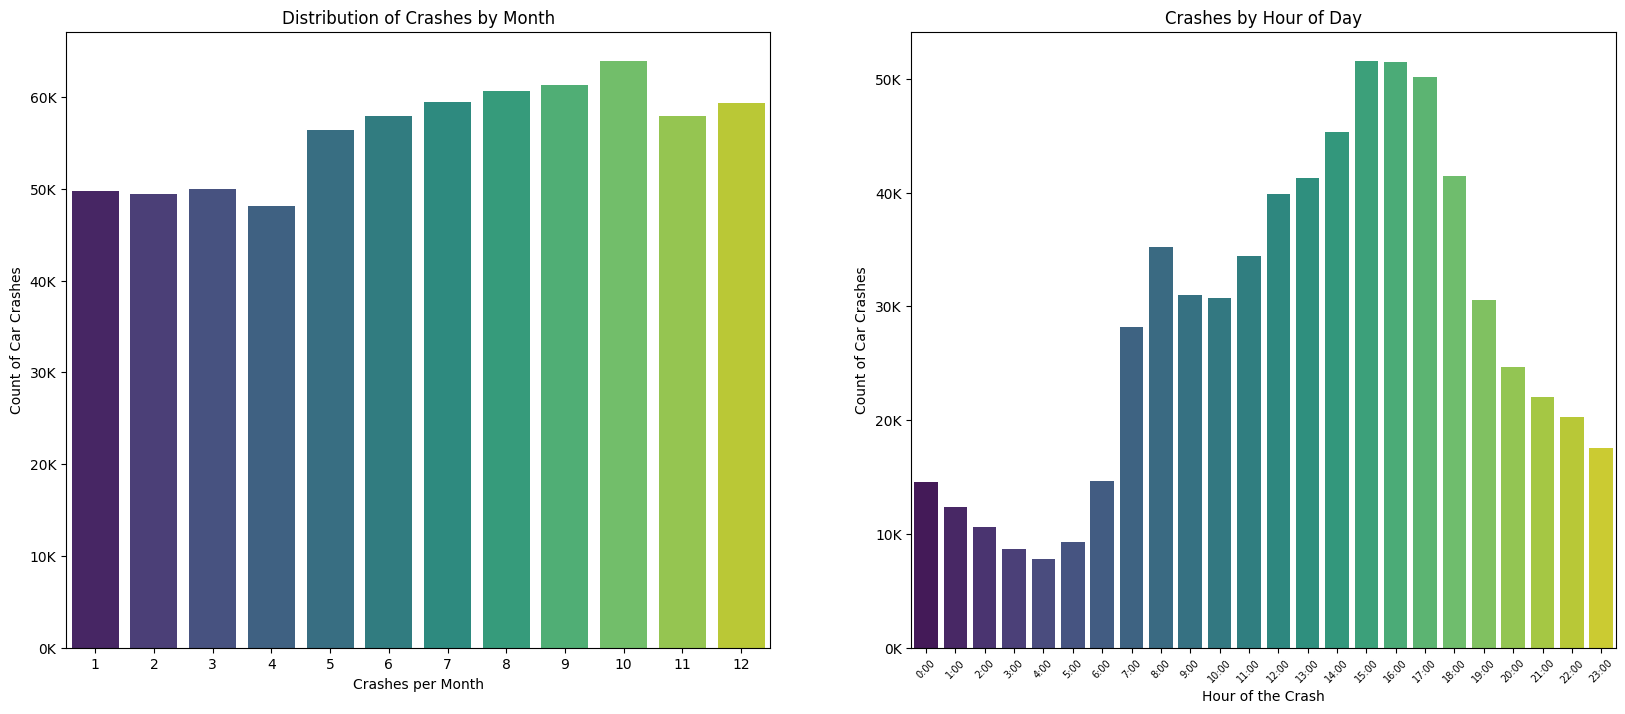

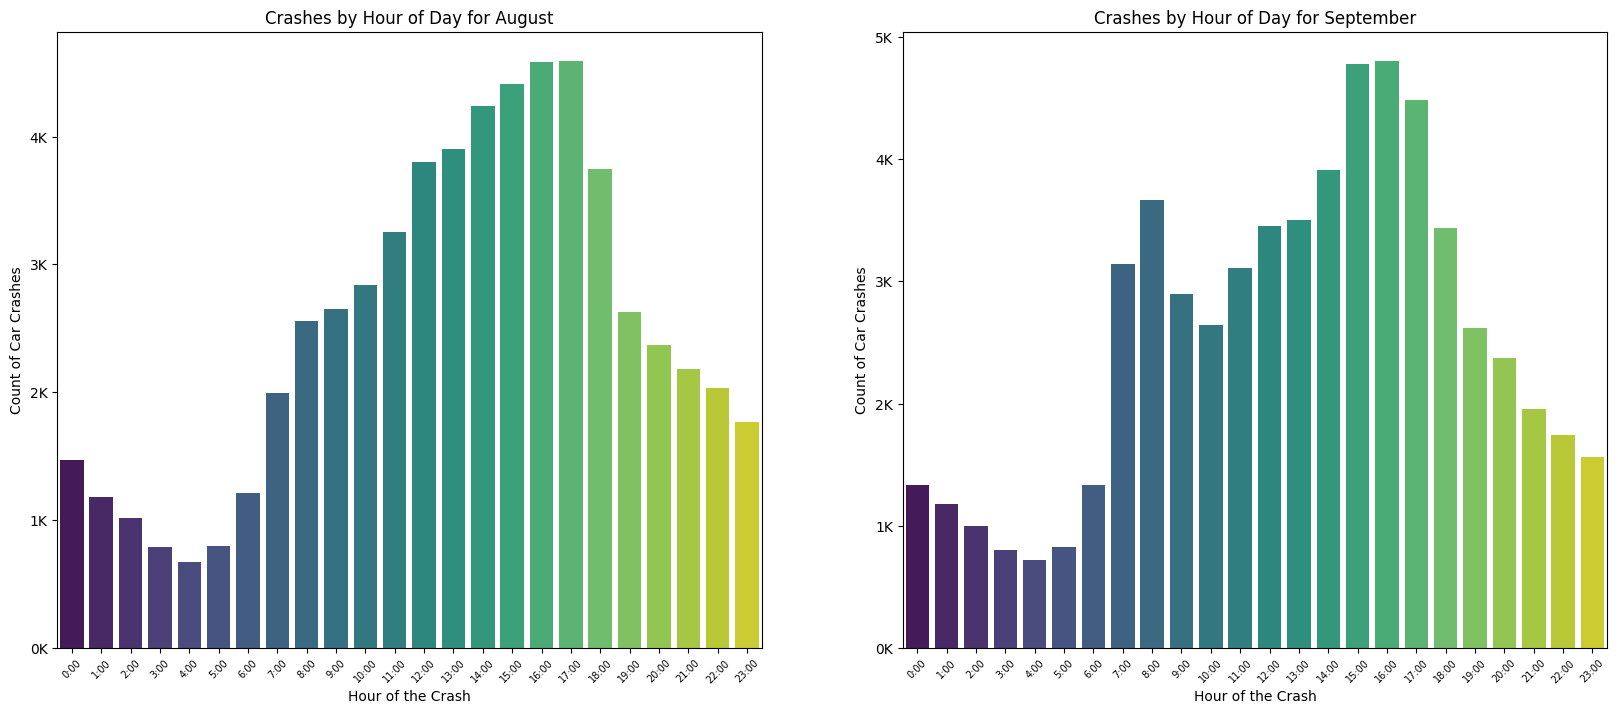

In [ ]:
#Graph 1: Distribution of Crashes by Month
from matplotlib.ticker import FixedLocator, FixedFormatter
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CRASH_MONTH', palette='viridis')
plt.xlabel('Crashes per Month')
plt.ylabel('Count of Car Crashes')
plt.title('Distribution of Crashes by Month')

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))


# Graph 2: Crashes by Hour of Day
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='CRASH_HOUR', palette='viridis')
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

plt.show();


# Graph 3: Crashes by Hour of Day for August
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
df_Aug = df[df["CRASH_MONTH"]== 8]
sns.countplot(data=df_Aug, x='CRASH_HOUR', palette='viridis')
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day for August')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

# Graph 4: Crashes by Hour of Day for September
plt.subplot(1, 2, 2)
df_Sep = df[df["CRASH_MONTH"]== 9]
sns.countplot(data=df_Sep, x='CRASH_HOUR', palette='viridis')
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day for September')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

plt.show();




**Answer 2:**
To understand when exactly the accidents happen from a macroscopic perspective, we plotted the months of the accident against the count of accidents, hence demonstrated in the top graph. We can see that August and September experienced the most crashes acorss the year.
Since we are also curious about when the accidens happened, we plotted the crashes by hour of day, with the first graph being the distribution across all days recorded in the data, but with the latter two graphs singled out the month of August and September, to see if there is any particular differences between the distribution of hours.
From graphs, it can be noticed that overall there is relatively more crashes during the afternoon hours, from 2-5pm, and another spike at 7-8am. The pattern of distribution is interesting as one might intuitively think that the rush hours to and from work should observe the most accidents.

**Question 3:**
What is the consequences of traffic accidents in Chicago? That is to say, how is the distribution in terms of the amount of financial loss and the degree of personal injury in all car crashes?

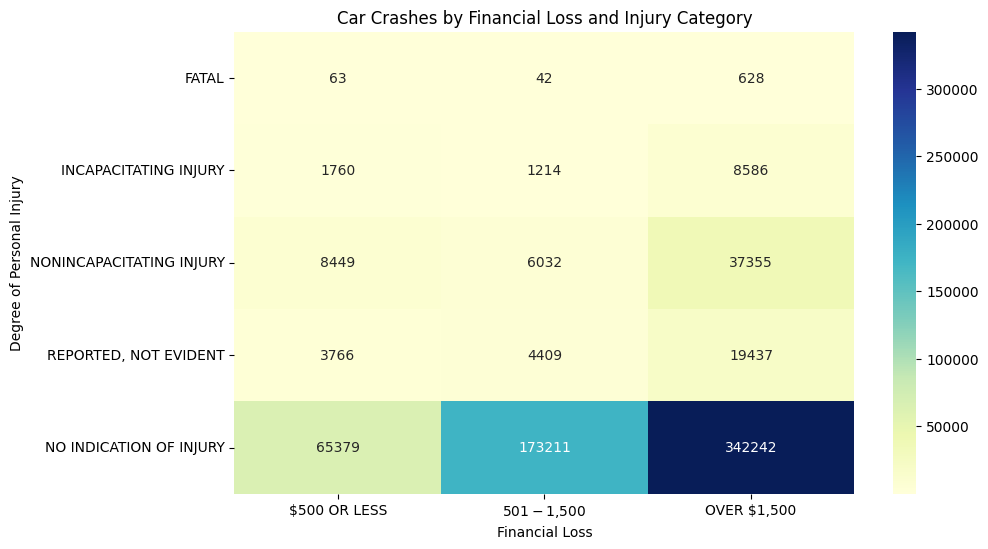

In [ ]:
# Define a custom order for the Injury Categories
custom_order_injury = ['FATAL','INCAPACITATING INJURY', 'NONINCAPACITATING INJURY', 'REPORTED, NOT EVIDENT' ,'NO INDICATION OF INJURY']
# Convert the 'Injury Category' column to a Categorical data type with the specified order
df['MOST_SEVERE_INJURY'] = pd.Categorical(df['MOST_SEVERE_INJURY'], categories=custom_order_injury, ordered=True)
# Pivot the data using pivot_table to create a matrix
heatmap_data = df.pivot_table(index='MOST_SEVERE_INJURY', columns='DAMAGE', values='CRASH_RECORD_ID', aggfunc='count')
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Car Crashes by Financial Loss and Injury Category')
plt.xlabel('Financial Loss')
plt.ylabel('Degree of Personal Injury')
plt.show()

**Answer 3:**


To understand the impact and consequences of traffic accidents in Chicago, question 3 analyzes the financial losses and personal injuries caused by car crashes.

*   ***In the 'over 1,500 dollars' financial loss category***, a significant majority of car crashes fallen in financial losses exceeding 1,500 dollars. Notably, approximately 400,000 car incidents had no injuries to individuals, while nearly 43,000 people sustained Nonincapacitating Injuries and became as the second-highest injury. Moreover, it had the highest frequency of fatal events, with 723 people lost their lives. Comparing to all other categories combined, this frequency is approximately six times greater than the combined total of fatalities in the other categories.
*   ***In the '501-1,500 dollars' financial loss category***, the number of accidents decreased compared to the '1,500 dollars' category. The majority of car crashes in this category had no reported injuries, and approximately 7,000 people sustained Nonincapacitating injuries making it the second-highest injury category. Additionally, this category had the lowest number of fatal events, with 48 people lost their lives.
*   **In the '500 dollars or less' financial loss category**, it had the lowest number of car crashes compared to the other categories. Nearly 73,000 car crashes were reported with no reported injuries to people. Nonincapacitating injuries were reported in around 9,500 car crashes, making it the second-highest injury category. Additionally, fatal events were slightly increased to report 69 people lost their lives.

**Question 4:**
What is the primary cause in the event with the highest financial loss? What is the primary cause in the event that has both the highest financial loss and the most severe personal injuries?

In [ ]:
# Categorizing PRIM_CONTRIBUTORY_CAUSE column into 6 categories
cause_mapping = {
    'Human Error': [
        'FAILING TO YIELD RIGHT-OF-WAY', 'IMPROPER OVERTAKING/PASSING', 'IMPROPER LANE USAGE',
        'FAILING TO REDUCE SPEED TO AVOID CRASH', 'IMPROPER TURNING/NO SIGNAL',
        'FOLLOWING TOO CLOSELY', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
        'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
        'DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING STOP SIGN', 'TURNING RIGHT on RED',
        'DISREGARDING OTHER TRAFFIC SIGNS', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
        'DISREGARDING YIELD SIGN', 'PASSING STOPPED SCHOOL BUS',
        'EXCEEDING AUTHORIZED SPEED LIMIT', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
        'BICYCLE ADVANCING LEGALLY ON RED LIGHT','IMPROPER BACKING','DRIVING ON WRONG SIDE/WRONG WAY',
    ],
    'Environmental Factors': [
        'WEATHER', 'ROAD CONSTRUCTION/MAINTENANCE', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
        'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'OBSTRUCTED CROSSWALKS',
    ],
    'Technical Failures': [
        'EQUIPMENT - VEHICLE CONDITION', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
    ],
    'Distracted Driving': [
        'DISTRACTION - FROM INSIDE VEHICLE', 'CELL PHONE USE OTHER THAN TEXTING',
        'DISTRACTION - FROM OUTSIDE VEHICLE', 'TEXTING',
    ],
    'Impaired Driving': [
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
    ],
    'Other': [
         'NOT APPLICABLE','ANIMAL',
        'RELATED TO BUS STOP', 'EXCEEDING SAFE SPEED FOR CONDITIONS'
    ]
}

# Creating a new column 'PRIM_CONTRIBUTORY_CAUSE_CATEG' based on the mapping
df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] = df['PRIM_CONTRIBUTORY_CAUSE'].map(
    {value: category for category, values in cause_mapping.items() for value in values}
)


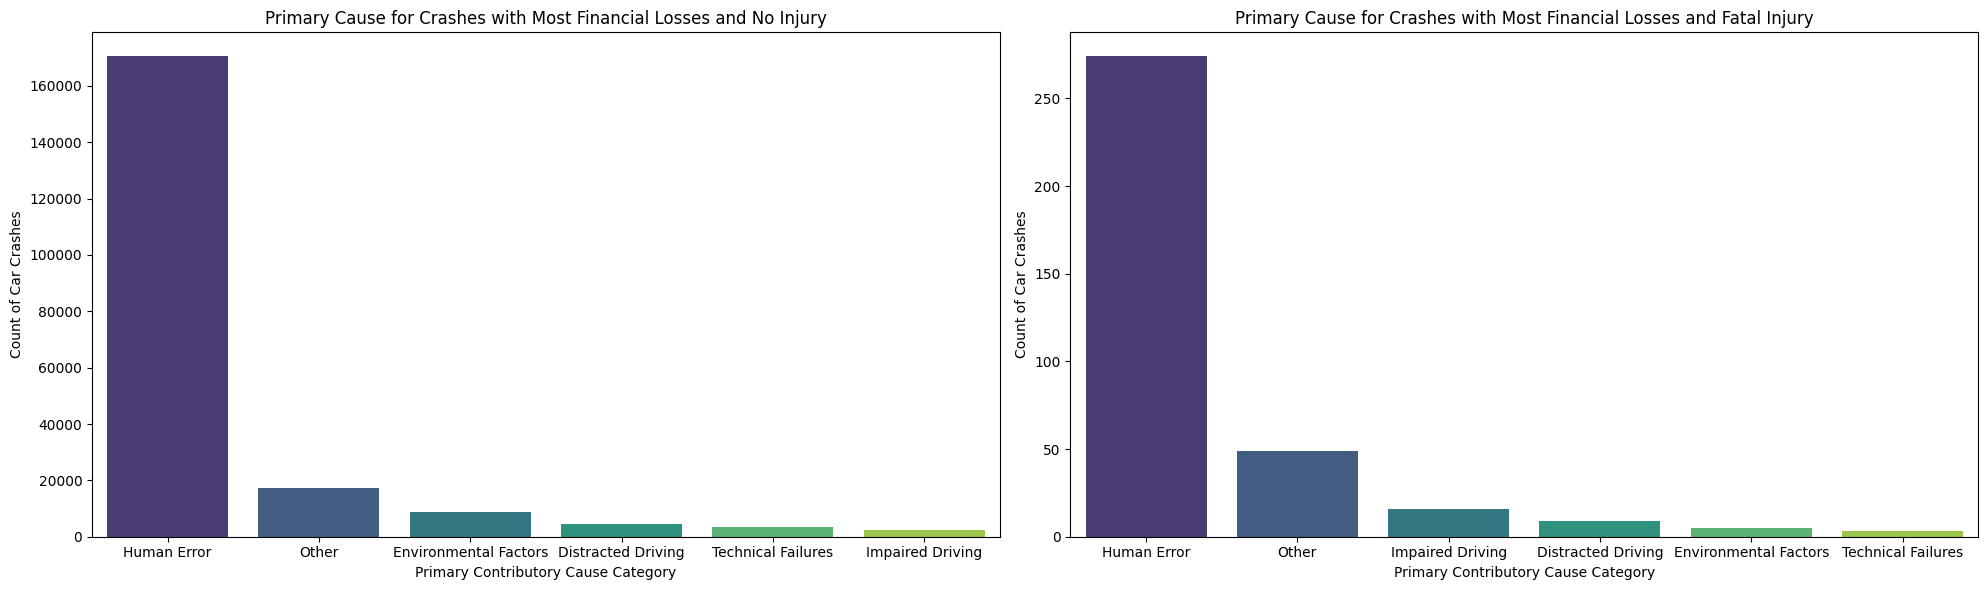

In [ ]:
# Filter conditions: Maximum damage loss and no injuries
max_damage_no_injury_df = df[(df['DAMAGE'] == 'OVER $1,500') & (df['MOST_SEVERE_INJURY'] == 'NO INDICATION OF INJURY')]
# Filter conditions: Maximum money loss and fatal injuries
max_damage_fatal_injury_df = df[(df['DAMAGE'] == 'OVER $1,500') & (df['MOST_SEVERE_INJURY'] == 'FATAL')]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1 Primary Cause for Most Damages and No Injury
sns.countplot(data=max_damage_no_injury_df, x='PRIM_CONTRIBUTORY_CAUSE_CATEG', order=max_damage_no_injury_df['PRIM_CONTRIBUTORY_CAUSE_CATEG'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Primary Cause for Crashes with Most Financial Losses and No Injury')
axes[0].set_xlabel('Primary Contributory Cause Category')
axes[0].set_ylabel('Count of Car Crashes')

# Plot 2 Primary Cause for Most Damages and Fatal Injury
sns.countplot(data=max_damage_fatal_injury_df, x='PRIM_CONTRIBUTORY_CAUSE_CATEG', order=max_damage_fatal_injury_df['PRIM_CONTRIBUTORY_CAUSE_CATEG'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_title('Primary Cause for Crashes with Most Financial Losses and Fatal Injury')
axes[1].set_xlabel('Primary Contributory Cause Category')
axes[1].set_ylabel('Count of Car Crashes')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined graph
plt.show()

**Answer 4:**



*   According to the chart titled **‘Primary Cause for Crashes with Most Financial Losses and No Injury’**, it can be seen clearly that Human Errors stand out as the primary cause behind car crashes resulting in substantial financial losses but no injuries to individuals. Over 175,000 car-crashes happened because of human errors. Other reasons are sharply decreased to accounting for approximately 37,000 accidents, with a noticeable steady decline to report around 3,200 car crashes as a result of impaired driving.

*   When examining car **crashes resulting in fatal injuries and estimated losses exceeding $1,500,** Human Errors indicated as the primary factor contributing to both fatalities and increased financial losses. Other factors, such as accidents involving animals on the road, were responsible for approximately 75 fatal injuries. In contrast, the incidence of fatalities due to car technical failures remained relatively low, accounting for approximately three lives lost.



**Question 5:**
Where did the accidents happen and which regions had the most accidents happened in?


In [ ]:
import folium
from folium.plugins import MarkerCluster
import random

df = df.dropna(subset=["LATITUDE"])     # Dropping NaN values in LATITUDE column
df = df.dropna(subset=["LONGITUDE"])    # Dropping NaN values in LATITUDE column

sample_size = 3000  # You can change this to control the sample size
sampled_df = df.sample(sample_size)   # Sampling a subset of data

# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(chicago_map)

for index, row in sampled_df.iterrows():

    # Creating pop-ups
    popup_text = f"""
    <strong>Location:</strong> {row['LATITUDE']}, {row['LONGITUDE']}<br>
    <strong>Speed Limit:</strong> {row['POSTED_SPEED_LIMIT']} mph<br>
    <strong>Primary Cause:</strong> {row['PRIM_CONTRIBUTORY_CAUSE']}<br>
    <strong>Damage Cost:</strong> {row['DAMAGE']}<br>
    <strong>Date + Time:</strong> {row['CRASH_DATE']}
    """

    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(popup_text, max_width=300),  # formatting the text with the pop-up
    ).add_to(marker_cluster)


title_html = '''
             <h3 align="center" style="font-size:20px"><b>Chicago Car Crashes</b></h3>
             '''
chicago_map.get_root().html.add_child(folium.Element(title_html))       # Adding a title to the map


chicago_map.save('chicago_car_crashes.html')  # Saving as an HTML file

chicago_map  # Displaying the Chicago map in Google Colab


**Answer 5:**
To answer this question, we utilized the latitude and longitude of the variables to create an **interactive** geospatial map of accidents across Chicago. We are using the folium's MarkerClusterm plugin which has a default maximum cluster size of 5000 markers. Since our dataset is already extremely large, in order to properly present, we will use data sampling and marker clustering to improve performance.

Here, we have added pop ups using popup_text to add information about primary cause of crash, location, date + time, speed limit and damage cost to show how and why the crash took place. This gives us detailed insight about where crashes are more likely to occur in a randomly sampled subset of data from our dataframe from chicago.



# **Summary:**

Through our analysis of Chicago's traffic accident data, we uncovered significant findings into the timing, causes, consequences, and locations of accidents.

We deduced that accidents predominantly occurred during daylight on dry road surfaces under clear weather conditions. In these cases, there were intersections lacking traffic control devices, increasing the probability of accidents taking place. The months of August and September had the highest accident frequency, with peak times during the morning and afternoon rush hours. Most accidents resulted in financial losses exceeding $1,500, with the majority causing no injuries, while non-incapacitating injuries were the second-highest category.

Furthermore, human error emerged as the primary cause of accidents with severe consequences. Our final geospatial analysis revealed clusters of accidents across Chicago, providing insights into causes, and associated factors in the recorded accident locations, all of which contribute to our understanding of road safety issues within the city of Chicago.



# **References:**

1. https://python-visualization.github.io/folium/latest/

2. https://medium.com/@sawsanyusuf/data-visualization-with-python-9-generating-maps-with-folium-e7563bc1a923


**Use of Gen AI**

1. We used generative AI to provide 6 appropriate category labels, under which we could categorize all the unique contributory causes for car accidents. Similarly, we generated category labels for the unique values of traffic control devices and weather conditions as well.
